# Importing some useful libraries

In [79]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

## Did some surfing and found some websites offering malicious links. And found some datasets

In [ ]:
phishing_data1 = pd.read_csv('phishing_urls.csv',usecols=['domain','label'],encoding='latin1', error_bad_lines=False)
phishing_data1.columns = ['URL','Label']
phishing_data2 = pd.read_csv('phishing_data.csv')
phishing_data2.columns = ['URL','Label']
phishing_data3 = pd.read_csv('phishing_data2.csv')
phishing_data3.columns = ['URL','Label']

In [ ]:
for l in range(len(phishing_data1.Label)):
    if phishing_data1.Label.loc[l] == '1.0':
        phishing_data1.Label.loc[l] = 'bad'
    else:
        phishing_data1.Label.loc[l] = 'good'

## Concatenate All datasets in one.

In [ ]:
frames = [phishing_data1, phishing_data2, phishing_data3]
phishing_urls = pd.concat(frames)

In [ ]:
#saving dataset
phishing_urls.to_csv(r'phishing_site_urls.csv', index = False)

## Loading the main dataset.

In [1]:
phish_data = pd.read_csv('phishing_site_urls.csv')

<IPython.core.display.Javascript object>

In [2]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [3]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [4]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [5]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

## Since it is classification problems so let's see the classes are balanced or imbalances

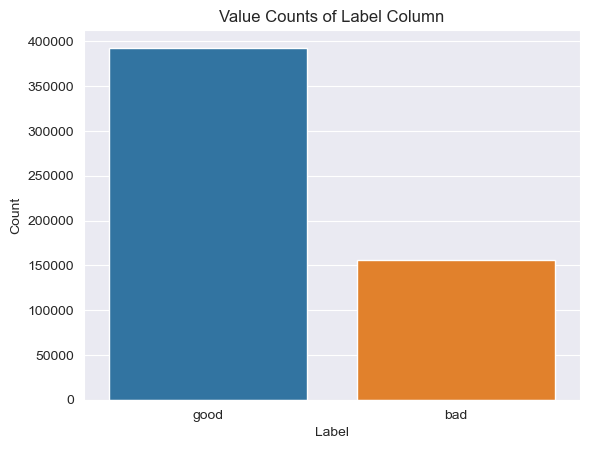

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing target_col
label_counts = phish_data.Label.value_counts()
sns.set_style('darkgrid')
sns.barplot(x=label_counts.index, y=label_counts)
plt.title('Value Counts of Label Column')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [7]:
!pip install nltk

In [8]:
from nltk.tokenize import RegexpTokenizer

In [9]:
phish_data = pd.read_csv('phishing_site_urls.csv')

<IPython.core.display.Javascript object>

In [10]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [11]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [12]:
tokenizer.tokenize(phish_data['URL'][0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [13]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...


NameError: name 'time' is not defined

In [ ]:
phish_data.sample(5)

## snowballAtemmer

In [14]:
stemmer = SnowballStemmer("english")

NameError: name 'SnowballStemmer' is not defined

In [15]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...


NameError: name 'time' is not defined

In [16]:
phish_data.sample(5)

,URL,Label
237747,search.espn.go.com/dennis-eckersley/,good
545100,petra-roebig.de/hqv4kz,bad
313084,deadheadland.com/tag/sunshine-becker/,good
260300,wn.com/Claude_Charron,good
253036,uk.linkedin.com/pub/melanie-morgan/22/82/897,good


In [17]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...


NameError: name 'time' is not defined

In [18]:
phish_data.sample(5)

,URL,Label
446240,theserverside.com/news/thread.tss?thread_id=30735,good
263197,123people.ca/s/martin+boivin,good
308938,contracostatimes.com/top-stories/ci_19272802,good
342038,freebase.com/view/en/david_heath_1969,good
332541,facebook.com/people/Robert-Gordon/1374609173,good


## Visualization

In [19]:
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [20]:
bad_sites.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [21]:
good_sites.head()

,URL,Label
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good


## create a function to visualize the important keys from url

In [22]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=400, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [23]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'text_sent'

In [24]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [25]:
from wordcloud import WordCloud, STOPWORDS
common_text = str(data)
common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

NameError: name 'data' is not defined

In [26]:
data = bad_sites.Label
data.reset_index(drop=True, inplace=True)

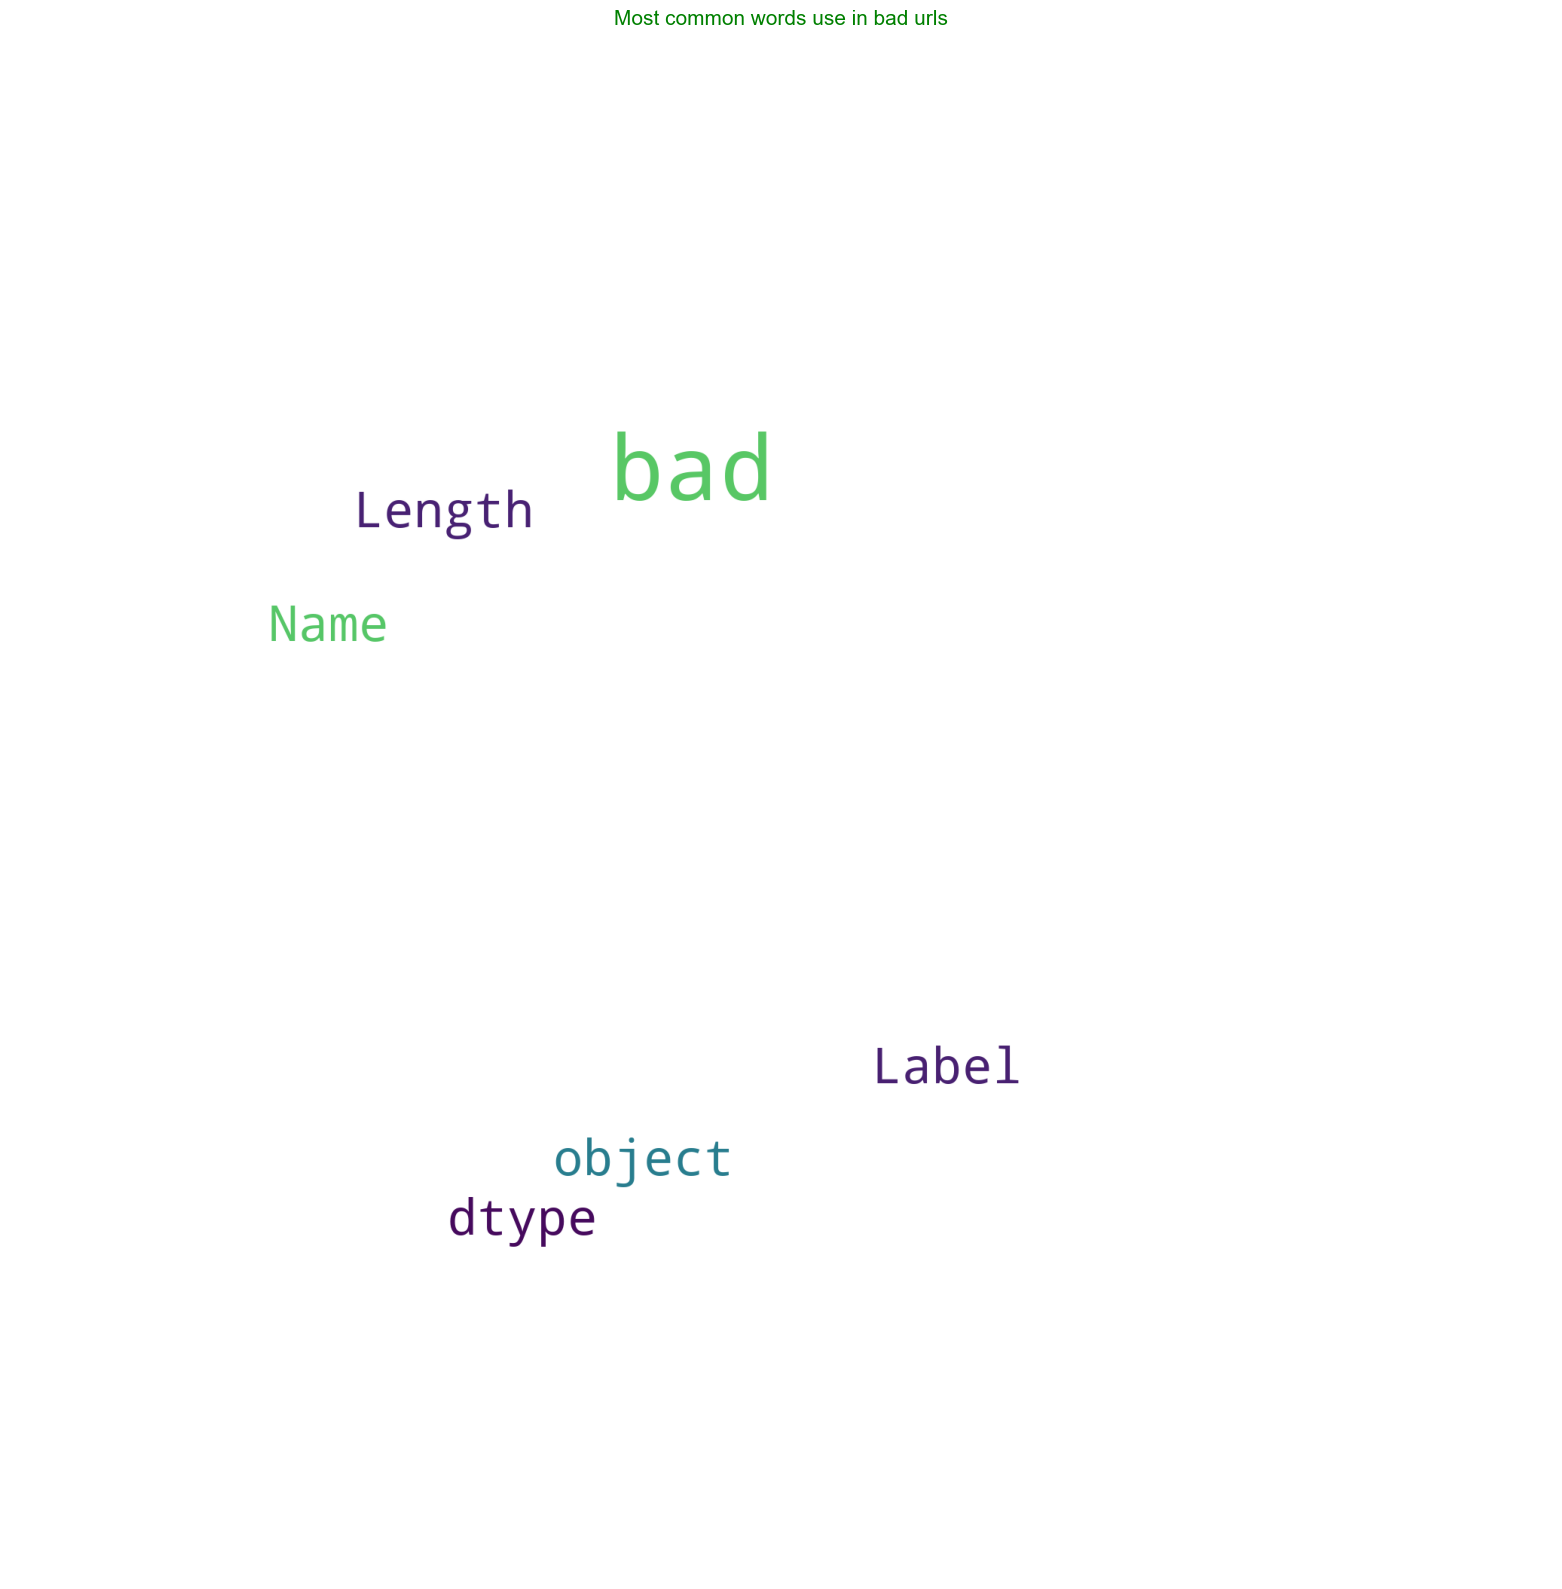

In [27]:
from wordcloud import WordCloud, STOPWORDS
common_text = str(data)
common_mask = np.array(Image.open('comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

## CountVectorizer

In [134]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [135]:
cv = CountVectorizer()

In [139]:
feature = cv.fit_transform(phish_data.text_sent)

In [141]:
feature[:5].toarray() 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Spliting the data

In [142]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

<IPython.core.display.Javascript object>

## LogisticRegression

In [147]:
lr = LogisticRegression()

<IPython.core.display.Javascript object>

In [148]:
lr.fit(trainX,trainY)

C:\Users\meera\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
lr.score(testX,testY)

0.9648019106285998

## Logistic Regression is giving 96% accuracy, Now we will store scores in dict to see which model perform best**

In [155]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [156]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9791485137460589
Testing Accuracy : 0.9648019106285998

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36871
        Good       0.99      0.96      0.98    100466

    accuracy                           0.96    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.96      0.97    137337


CONFUSION MATRIX


<Axes: >

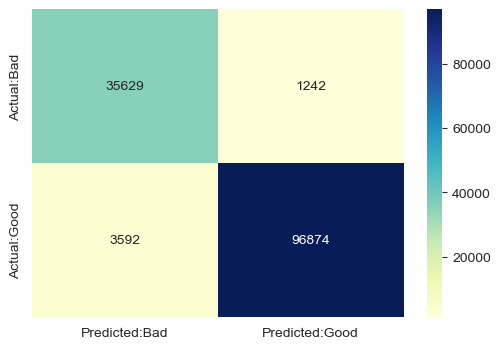

In [157]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")


## MultinomialNB

In [159]:
from sklearn.naive_bayes import MultinomialNB

In [160]:
mnb = MultinomialNB()

In [161]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [162]:

mnb.score(testX,testY)

0.957673460174607

## *** MultinomialNB gives us 95% accuracy**

In [163]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9744325973461745
Testing Accuracy : 0.957673460174607

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.94      0.93     38348
        Good       0.97      0.97      0.97     98989

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

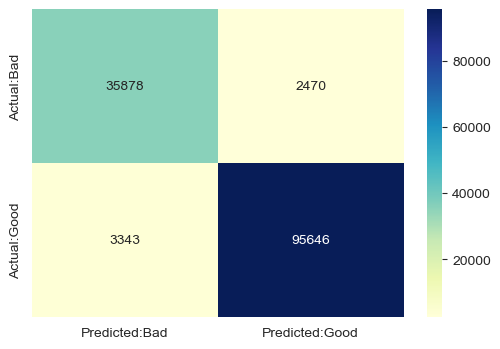

In [164]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<Axes: ylabel='Accuracy'>

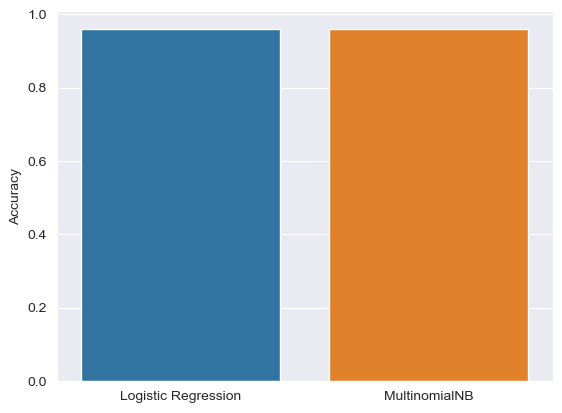

In [166]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(x=acc.index, y=acc.Accuracy)

## So, Logistic Regression is the best fit model, Now we make sklearn pipeline using Logistic Regression**

In [168]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.linear_model import LogisticRegression

In [169]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())


In [170]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

<IPython.core.display.Javascript object>

In [171]:
pipeline_ls.fit(trainX,trainY)

C:\Users\meera\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\meera\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

Training Accuracy : 0.9801970345307991
Testing Accuracy : 0.9664183723250107

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     37130
        Good       0.99      0.97      0.98    100207

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

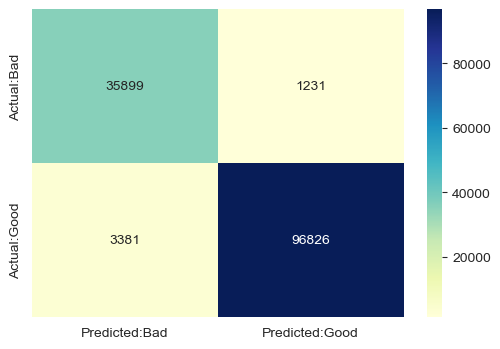

In [172]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [173]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

<IPython.core.display.Javascript object>

In [174]:

loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

<IPython.core.display.Javascript object>

0.9664183723250107


## That’s it. See, it's that simple yet so effective. We get an accuracy of 98%. That’s a very high value for a machine to be able to detect a malicious URL with. Want to test some links to see if the model gives good predictions? Sure. Let's do it

In [ ]:

* Bad links => this are phishing sites
yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php
fazan-pacir.rs/temp/libraries/ipad
www.tubemoviez.exe
svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt

* Good links => this are not phishing sites
www.youtube.com/
youtube.com/watch?v=qI0TQJI3vdU
www.retailhellunderground.com/
restorevisioncenters.com/html/technology.html

In [178]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

<IPython.core.display.Javascript object>

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']
